In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('mail_data.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.loc[df["Category"]=='ham',"Category",]=0
df.loc[df["Category"]=='spam',"Category",]=1

In [14]:
df.info()
df["Category"]=df["Category"].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   int32 
 1   Message   5572 non-null   object
dtypes: int32(1), object(1)
memory usage: 65.4+ KB


In [17]:
cnt=df['Category'].value_counts()

Category
0    4825
1     747
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

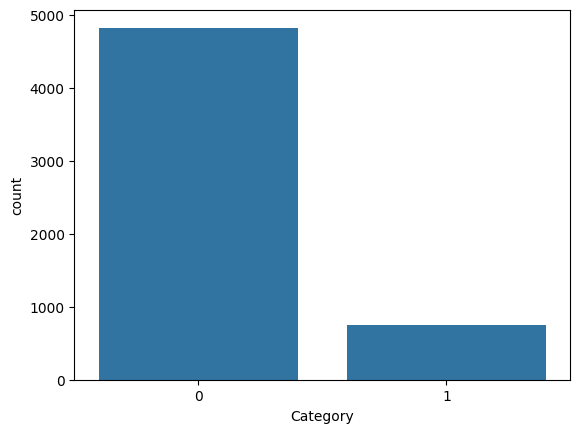

In [28]:
import seaborn as sns
sns.countplot(df,x='Category')

In [31]:
df.duplicated().sum()

415

In [32]:
df.drop_duplicates(inplace=True)

In [34]:

df.duplicated().sum()

0

In [35]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [36]:
df.shape

(5157, 2)

In [37]:
5572-415

5157

<Axes: xlabel='Category', ylabel='count'>

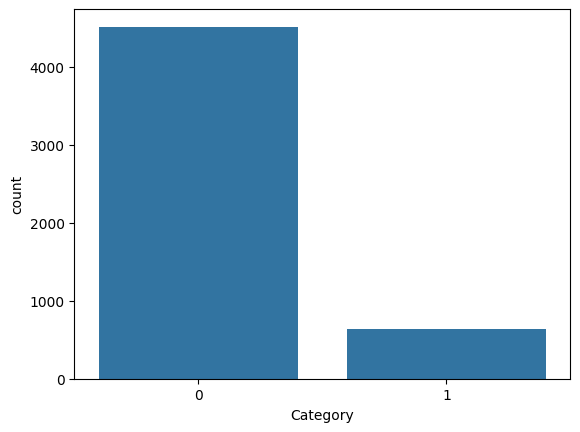

In [38]:
sns.countplot(df,x='Category')

In [39]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

In [46]:
X=df["Message"].values
Y=df["Category"].values
#panda series->values   <class 'pandas.core.series.Series'>-><class 'numpy.ndarray'>


In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2 , random_state= 0)

In [51]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

print(y_test.shape)

(4125,)
(4125,)
(1032,)
(1032,)


In [52]:

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
x_train_feature = cv.fit_transform(X_train)

In [53]:
print(x_train_feature)

  (0, 4837)	1
  (0, 4890)	1
  (0, 4627)	1
  (0, 7045)	1
  (0, 3443)	1
  (0, 737)	1
  (0, 7589)	1
  (1, 6689)	1
  (1, 2867)	1
  (1, 7593)	3
  (1, 5686)	1
  (1, 4891)	1
  (1, 5549)	1
  (1, 4767)	1
  (1, 7525)	1
  (1, 4451)	1
  (1, 7397)	1
  (1, 1229)	1
  (1, 1692)	1
  (1, 517)	1
  (1, 6013)	1
  (1, 6843)	1
  (1, 4737)	1
  (1, 1048)	1
  (1, 5151)	1
  :	:
  (4122, 7576)	1
  (4122, 2600)	1
  (4122, 6750)	1
  (4122, 3283)	1
  (4122, 5360)	1
  (4122, 3125)	1
  (4123, 7589)	1
  (4123, 6740)	1
  (4123, 1083)	1
  (4123, 1588)	1
  (4123, 6189)	1
  (4123, 5188)	1
  (4123, 4338)	1
  (4123, 2325)	1
  (4123, 4223)	1
  (4123, 1129)	1
  (4124, 936)	1
  (4124, 1873)	1
  (4124, 3335)	1
  (4124, 2955)	2
  (4124, 4931)	1
  (4124, 6747)	1
  (4124, 981)	1
  (4124, 3852)	1
  (4124, 1657)	1


In [57]:
print(x_train_feature.toarray())
print(len(x_train_feature.toarray()))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
4125


In [60]:

len(x_train_feature.toarray()[0]) #for every spam record we derive 7628 attribute(doc term)


7628

In [61]:

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train_feature, y_train)

MultinomialNB()

In [62]:
x_test_feature = cv.transform(X_test) #note that we use fittransform first, tranform for test 

In [63]:
print(len(x_test_feature.toarray()))
print(len(x_test_feature.toarray()[0]))

1032
7628


In [66]:
from sklearn.metrics import accuracy_score
prediction_on_training=nb.predict(x_train_feature)
score=accuracy_score(y_train,prediction_on_training)
print('accuracy on training data %s'%score)

accuracy on training data 0.992969696969697


In [65]:

prediction_on_test=nb.predict(x_test_feature)
score=accuracy_score(y_test,prediction_on_test)
print('accuracy on test data %s'%score)

accuracy on test data 0.9864341085271318


In [70]:
email = ['Hey, Jack whats up dude? Tomorrow please meet with me at my home.']

clean_email = cv.transform(email)
len(clean_email.toarray()[0]) #also using 7628 attribute trained before
check = nb.predict(clean_email)
if check[0]==0:
    print('ham')
else:
    print('spam')

ham
